# <center>MACHINE LEARNING <br> <br> Problem Session 2 <br> Gaussian models</center>

**USEFULL PYTHON FUNCTIONS**
- **mu = np.mean(X)** returns the mean of X taking each row as a sample, i.e., if X is a $n\times m$ matrix, **np.mean(X)** is a $1 \times m$ matrix.<br>
To compute the mean along the columns (taking each column as a sample), **np.mean(X, axis = 1)**.
<br>

- **Cov = np.cov(X)** returns the covariance matrix of X considering each column as a sample.
<br>

- **X_inv = np.linalg.inv(X)** returns the inverse of a matrix X.
<br>

- **np.dot(A,B)** returns the dot product of A and B (can be matrices).
<br>

- **np.arccos(a)** returns the arccos (cos$^{-1}$) of a $\in [-1,1]$, i.e, an angle $\theta$ (in radians) such that cos($\theta$) = a.
<br>

- **np.linalg.svd(A)** returns the matrices U, D, and V$^T$ such that A = UDV$^T$. <br>
u, s, vh = np.linalg.svd(A) $\Rightarrow$ smat = np.diag(s), A = np.dot(u, np.dot(smat, vh))
<br>

- **plt.scatter(x,y)** plots the points (as dots) whose x-coordinates is given by the array x and whose y-coordinates is given by y.
<br>

- **plt.plot(x,y)** same as plt.scatter but with lines (other options are available).

In [4]:
################################
# NEEDED IMPORTS AND FUNCTIONS #
################################

# LLIBRERIES
import numpy as np
import matplotlib.pyplot as plt

### Exercice 7

1. Write a Python function that, given a mean and a covariance (in $\mathbb{R}^2$), returns the principal directions of the Gaussian and their variances, and plots the points at Mahalanobis distance $k$ (where $k$ is given as input).
2. Write a Python function that, given a set of points, estimates the Gaussian model from which they are drawn and plots the points, together with several (of choice) ellipses of Mahalanobis distances and the principal directions.
3. Write a Python function that, given a Gaussian model, i.e, $\vec{\mu}, \vec{\Sigma}$, draws $n$ samples from that distribution.

TIP: Use the Numpy function np.random.multivariate\_normal.

(array([2., 0.]), array([[-0.70710678,  0.70710678],
        [ 0.70710678,  0.70710678]]), array([4.85714286, 0.85714286]))

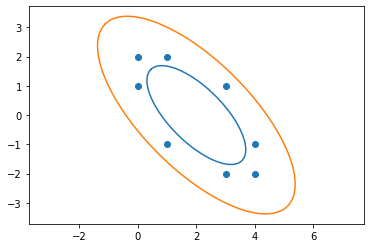

In [5]:
# 1
def PC_and_Mhd(mu,Cov,k):
    u, s, vh = np.linalg.svd(Cov)

    a = np.sqrt(s[0]) * k
    b = np.sqrt(s[1]) * k
    t = np.linspace(0, 2*np.pi, 200)
    
    newBasis = np.dot( u, np.array([a*np.cos(t),b*np.sin(t)]) )
    plt.plot(newBasis[0,:]+mu[0],newBasis[1,:]+mu[1])

    return u, s


# 2
def Gaussian_model(X):

    mu = np.mean(X,axis = 1)
    Cov = np.cov(X)

    plt.scatter(X[0,:], X[1,:])
    plt.axis('equal')
    
    u, s = PC_and_Mhd(mu,Cov,1)
    u, s = PC_and_Mhd(mu,Cov,2)
#     u, s = PC_and_Mhd(mu,Cov,3)
    
    return mu, u, s


# 3
def draw_samples_from_Gaussian(mu,Cov,n):
    X = np.random.multivariate_normal(mu,Cov,n)
    return X


X = np.array([[0, 0, 1, 1, 3, 3, 4, 4],[2, 1, 2, -1, 1, -2, -1, -2]])

Gaussian_model(X)